In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs
import seaborn as sns 
from scipy.stats import norm

In [34]:
df_iris = pd.read_csv('..\StatistiskaMetoder\data\iris.csv') 
diamonds_df = pd.read_csv('..\StatistiskaMetoder\data\diamonds.csv')
car_df = pd.read_csv('..\StatistiskaMetoder\data\cars.csv')

In [35]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sepal_length   150 non-null    float64
 1    sepal_width   150 non-null    float64
 2    petal_length  150 non-null    float64
 3    petal_width   150 non-null    float64
 4    class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [36]:
df_iris[' class'].unique() # we can see that there are 3 different types of Iris

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [37]:
# Now I will separate so that the 3 types have a separate table each.

df_setosa = df_iris[df_iris[' class'] == 'Iris-setosa'].reset_index(drop=True)
df_versicolor = df_iris[df_iris[' class'] == 'Iris-versicolor'].reset_index(drop=True)
df_virginica = df_iris[df_iris[' class'] == 'Iris-virginica'].reset_index(drop=True)

# we can tell that each data set has a total of 50 of the 3 different types of Iris flowers
# This is good as it is equal sample sets for each type


In [88]:
df_setosa.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


In [39]:
# I will now look at the different types of average (mean,median and mode) for sepal length of the  setosa Iris flower.

df_setosa['sepal_length'].describe()[["mean","50%"]]


mean    5.006
50%     5.000
Name: sepal_length, dtype: float64

In [64]:
# getting the mean and median of the length of stem(sepal) for each Iris type
setosa_sep_length_mean = df_setosa["sepal_length"].mean().round(2)
setosa_sep_length_median = df_setosa["sepal_length"].median().round(2)
setosa_sep_stan_dev = np.std(df_setosa["sepal_length"],ddof=1).round(2)
print(f"The Setosa Iris stem has a mean of {setosa_sep_length_mean}, median of {setosa_sep_length_median} and a Standard deviation of {setosa_sep_stan_dev}")

versicolor_sep_length_mean = df_versicolor["sepal_length"].mean().round(2)
versicolor_sep_length_median = df_versicolor["sepal_length"].median().round(2)
versicolor_sep_stan_dev = np.std(df_versicolor["sepal_length"],ddof=1).round(2)
print(f"The Versicolor Iris stem has a mean of {versicolor_sep_length_mean}, median of {versicolor_sep_length_median} and Standard deviation of {versicolor_sep_stan_dev}")

virginica_sep_length_mean = df_virginica["sepal_length"].mean().round(2)
virginica_sep_length_median = df_virginica["sepal_length"].median().round(2)
virginica_sep_stan_dev = np.std(df_virginica["sepal_length"],ddof=1).round(2)
print(f"The Virginica Iris stem has a mean {virginica_sep_length_mean}, median {virginica_sep_length_median} and a Standard deviation of {versicolor_sep_stan_dev}")


The Setosa Iris stem has a mean of 5.01, median of 5.0 and a Standard deviation of 0.35
The Versicolor Iris stem has a mean of 5.94, median of 5.9 and Standard deviation of 0.52
The Virginica Iris stem has a mean 6.59, median 6.5 and a Standard deviation of 0.52


In [59]:
print(f"{setosa_sep_mode}")

0    5.0
1    5.1
Name: sepal_length, dtype: float64


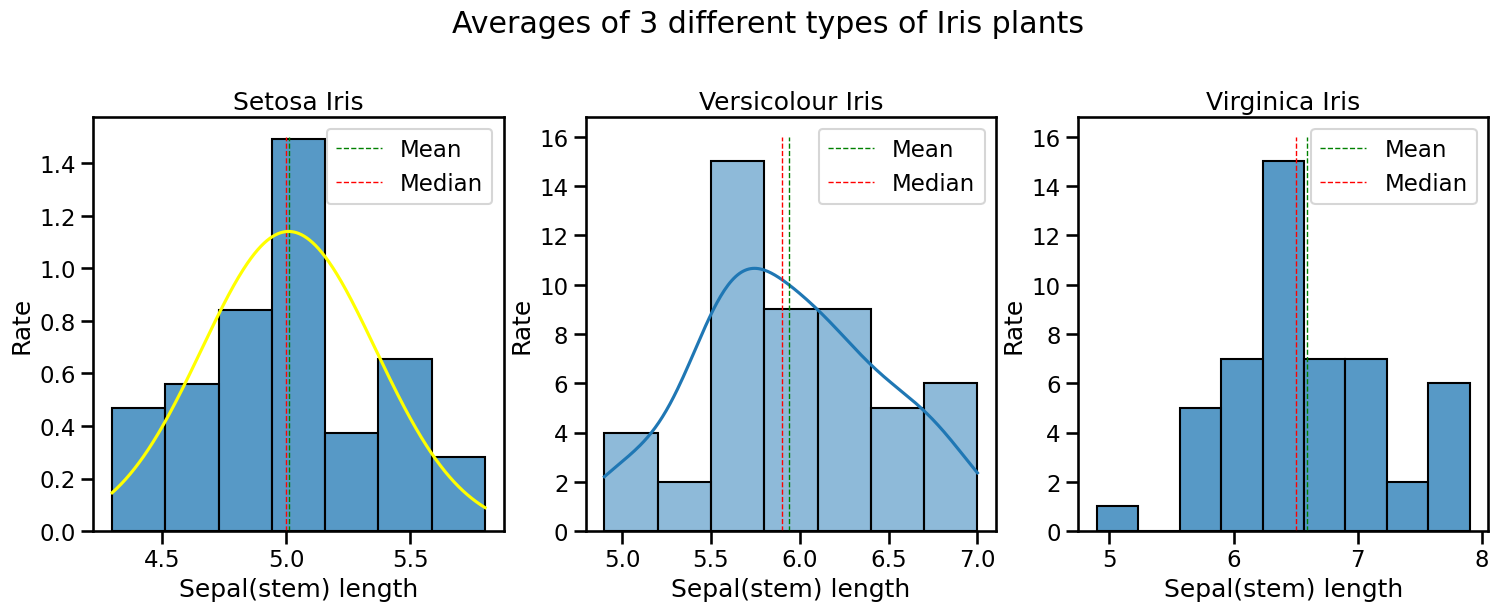

In [97]:
# plot on 3 different graphs median and mean of the stem length of each different varieties of Iris

fig, ax = plt.subplots(1,3, figsize= (18,6))

# setosa plot
sns.histplot(ax = ax[0], x = "sepal_length", data=df_setosa, stat="density")
sns.set_context("talk")
fig.subplots_adjust(top=.8)
fig.suptitle('Averages of 3 different types of Iris plants')

ax[0].set(title="Setosa Iris", xlabel= "Sepal(stem) length", ylabel= "Rate")
ax[0].plot([setosa_sep_length_mean, setosa_sep_length_mean], [0, 1.5], color='green', linestyle='--', linewidth=1, label='Mean')
ax[0].plot([setosa_sep_length_median, setosa_sep_length_median], [0, 1.5], color='red', linestyle='--', linewidth=1, label='Median')
ax[0].legend(loc='upper right')

setosa_x = np.linspace(4.3, 5.8, 1000)
setosa_y = norm.pdf(x= setosa_x , loc=setosa_sep_length_mean, scale=setosa_sep_stan_dev)
ax[0].plot(setosa_x,setosa_y, color="yellow", label="Norm")

# versicolor plot
sns.histplot(ax = ax[1], x= "sepal_length", data=df_versicolor, kde=True)
ax[1].set(title="Versicolour Iris", xlabel="Sepal(stem) length", ylabel="Rate")
ax[1].plot([versicolor_sep_length_mean, versicolor_sep_length_mean], [0, 16], color='green', linestyle='--', linewidth=1, label='Mean')
ax[1].plot([versicolor_sep_length_median, versicolor_sep_length_median], [0, 16], color='red', linestyle='--', linewidth=1, label='Median')
ax[1].legend(loc='upper right')

# virginica plot
sns.histplot(ax = ax[2], x= "sepal_length", data=df_virginica)
ax[2].set(title="Virginica Iris", xlabel="Sepal(stem) length", ylabel="Rate")
ax[2].plot([virginica_sep_length_mean, virginica_sep_length_mean], [0, 16], color='green', linestyle='--', linewidth=1, label='Mean')
ax[2].plot([virginica_sep_length_median, virginica_sep_length_median], [0, 16], color='red', linestyle='--', linewidth=1, label='Median')
ax[2].legend(loc='upper right')

plt.show()

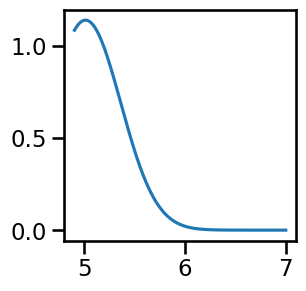

In [82]:
setosa_x = np.linspace(4.9, 7, 1000)
setosa_y = norm.pdf(x= setosa_x , loc=setosa_sep_length_mean, scale=setosa_sep_stan_dev)

fig, ax = plt.subplots() # Skapa en plot med matplotlib
fig.set_figheight(3) # Sätt figurhöjd
fig.set_figwidth(3) # Sätt figurbredd

ax.plot(setosa_x,setosa_y) # Plotta x vs y
plt.show() # Visa plotten